# AdaBoost和GBDT

## 1. 基础用法

1. AdaBoost分类模型

In [16]:

from sklearn.ensemble import AdaBoostClassifier
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [0, 0, 0, 1, 1]

model = AdaBoostClassifier(random_state=123)
model.fit(X, y)

print(model.predict([[5, 5]]))

[0]


2. AdaBoost回归模型

In [17]:
from sklearn.ensemble import AdaBoostRegressor
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 2, 3, 4, 5]

model = AdaBoostRegressor(random_state=123)
model.fit(X, y)

print(model.predict([[5, 5]]))

[3.]


## 2. 案例：AdaBoost信用卡精准营销模型

1. 读取数据

In [18]:
import pandas as pd
df = pd.read_excel('信用卡精准营销模型.xlsx')
df.head()

,年龄,月收入（元）,月消费（元）,性别,月消费/月收入,响应
0,30,7275,6062,0,0.833265,1
1,25,17739,13648,0,0.769378,1
2,29,25736,14311,0,0.556069,1
3,23,14162,7596,0,0.536365,1
4,27,15563,12849,0,0.825612,1


2. 提取特征变量和目标变量

In [19]:
X = df.drop(columns='响应') 
y = df['响应']

3. 划分训练集和测试集

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

4. 模型训练及搭建

In [21]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1)
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

5. 模型预测及评估

In [22]:
# 查看预测准确度
from sklearn.metrics import accuracy_score
y_pred = clpredict(X_test)f.
y_pred_proba = clf.predict_proba(X_test)
score = accuracy_score(y_pred, y_test)
print(score)

0.785


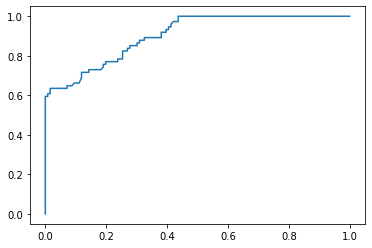

In [23]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [24]:
# 查看AUC值
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
print(score)

0.9035285285285286


In [25]:
# 查看特征重要性
clf.feature_importances_

array([0.14, 0.18, 0.3 , 0.02, 0.36])

In [26]:
# 通过DataFrame的方式展示特征重要性
features = X.columns  # 获取特征名称
importances = clf.feature_importances_  # 获取特征重要性

# 通过二维表格形式显示
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
4,月消费/月收入,0.36
2,月消费（元）,0.30
1,月收入（元）,0.18
0,年龄,0.14
3,性别,0.02


## 3. GBDT模型

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [31]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)

0.775


In [33]:
# 查看模型参数介绍
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier?

Init signature:
GradientBoostingClassifier(
    *,
    loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='deprecated',
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :

TO DO：两种模型的区别？如何进行调参？